In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
df = pd.read_csv('penguins.csv')

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [439]:
df = df.drop(columns=['sex'])

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [440]:
df.dropna(inplace=True)

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


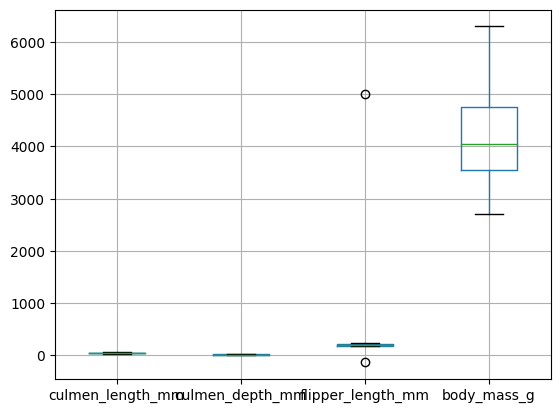

In [442]:
df.boxplot()
plt.show()

In [443]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [444]:
#Removing outliers
df = df[(df.flipper_length_mm < 1000) & (df.flipper_length_mm > 0)]

#Rescale Data

df.flipper_length_mm = df.flipper_length_mm / 10.0

df.body_mass_g = df.body_mass_g / 100.0

df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,340.000000,340.000000,340.000000,340.000000
mean,43.955000,17.130588,20.095588,42.010294
std,5.451108,1.961880,1.408972,8.042400
min,32.100000,13.100000,17.200000,27.000000
25%,39.275000,15.575000,19.000000,35.500000
50%,44.500000,17.300000,19.700000,40.250000
75%,48.500000,18.625000,21.325000,47.562500
max,59.600000,21.500000,23.100000,63.000000


In [445]:
from sklearn.cluster import KMeans

cls = KMeans(n_clusters=2)
cls.fit(df[['culmen_length_mm', 'culmen_depth_mm']])

KMeans(n_clusters=2)

In [446]:
print(cls.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [447]:
df['cluster'] = cls.labels_

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,18.1,37.5,1
1,39.5,17.4,18.6,38.0,1
2,40.3,18.0,19.5,32.5,1
4,36.7,19.3,19.3,34.5,1
5,39.3,20.6,19.0,36.5,1


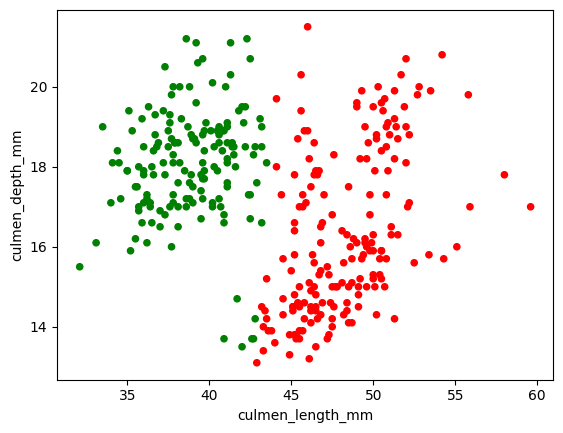

In [448]:
df['color'] = df.cluster.map({0: 'r', 1: 'g'})

df.plot.scatter(x='culmen_length_mm', y='culmen_depth_mm', c=df.color)

plt.show()

In [449]:
from sklearn.metrics import silhouette_score

silhouette_score(df[['culmen_length_mm', 'culmen_depth_mm']], cls.labels_)

0.5744946504798928

In [450]:
for i in range (2,10):
    cls = KMeans(n_clusters=i)
    cls.fit(df[['culmen_length_mm', 'culmen_depth_mm']])
    print(i, silhouette_score(df[['culmen_length_mm', 'culmen_depth_mm']], cls.labels_))

2 0.5744946504798928
3 0.4891819953606895
4 0.4283930380706563
5 0.40510682618179966
6 0.41844452227249945
7 0.4028053967234628
8 0.42033583202472674
9 0.4155409950733569


In [451]:
for i in range (2,10):
    cls = KMeans(n_clusters=i)
    cls.fit(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
    print(i, silhouette_score(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], cls.labels_))

2 0.49228033033496377
3 0.41007737255326543
4 0.43938374743833797
5 0.4155575069850303
6 0.4039726489529117
7 0.37526873847715464
8 0.3621398216160539
9 0.3271514626031738


In [452]:
cls = KMeans(n_clusters=2)
cls.fit(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

KMeans(n_clusters=2)

In [453]:
print(cls.labels_)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [454]:
df['cluster'] = cls.labels_

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster,color
0,39.1,18.7,18.1,37.5,0,g
1,39.5,17.4,18.6,38.0,0,g
2,40.3,18.0,19.5,32.5,0,g
4,36.7,19.3,19.3,34.5,0,g
5,39.3,20.6,19.0,36.5,0,g


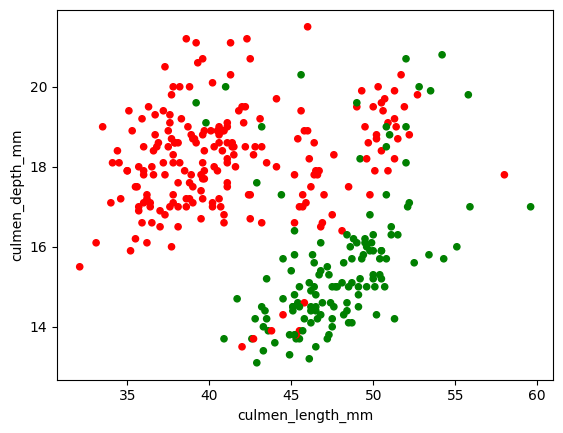

In [455]:
df['color'] = df.cluster.map({0: 'r', 1: 'g'})

df.plot.scatter(x='culmen_length_mm', y='culmen_depth_mm', c=df.color)

plt.show()

In [456]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

features = pca.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# print(pca.components_)

print(features)

df['pca1'] = features[:, 0]
df['pca2'] = features[:, 1]


[[-6.60770650e+00 -2.03558156e+00]
 [-5.78485391e+00 -2.06018725e+00]
 [-1.01315454e+01  1.20069271e+00]
 [-1.02193701e+01 -2.74392331e+00]
 [-7.45276106e+00 -1.20857808e+00]
 [-7.69489131e+00 -1.74280051e+00]
 [ 1.58456610e+00 -6.07663143e+00]
 [-1.10821562e+01 -5.28709815e+00]
 [-1.08875932e+01 -1.32117507e+00]
 [-7.51463940e+00 -3.10941630e+00]
 [-1.03374532e+01  2.11069248e+00]
 [-6.51990663e+00 -2.44485529e+00]
 [-8.05087669e+00 -4.12231665e+00]
 [-9.23533020e+00 -1.01272736e+00]
 [ 1.50540487e+00 -2.24670414e+00]
 [-1.24043089e+01 -4.29310406e+00]
 [ 3.92635857e-01  2.30305708e+00]
 [-1.03092185e+01 -1.62577021e+00]
 [-8.57351789e+00 -2.58888031e+00]
 [-7.59249912e+00 -5.04768733e+00]
 [-5.16786267e+00 -3.81260090e+00]
 [-6.17237098e+00 -2.69163646e+00]
 [-7.86743969e+00 -5.60784151e+00]
 [-7.61422276e+00  1.85485085e-01]
 [-1.05756369e+01  1.60595543e+00]
 [-1.24951451e+01 -3.64273660e-01]
 [-4.25570467e+00 -1.68466066e+00]
 [-1.06070119e+01  3.76504750e-01]
 [-6.16334928e+00 -4

In [457]:
cls = KMeans(n_clusters=2)
cls.fit(df[['pca1', 'pca2']])

KMeans(n_clusters=2)

In [458]:
print(cls.labels_)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [459]:
df['cluster'] = cls.labels_

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster,color,pca1,pca2
0,39.1,18.7,18.1,37.5,1,r,-6.607706,-2.035582
1,39.5,17.4,18.6,38.0,1,r,-5.784854,-2.060187
2,40.3,18.0,19.5,32.5,1,r,-10.131545,1.200693
4,36.7,19.3,19.3,34.5,1,r,-10.219370,-2.743923
5,39.3,20.6,19.0,36.5,1,r,-7.452761,-1.208578


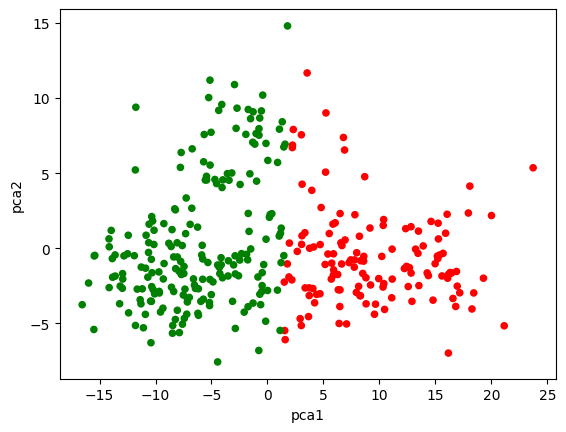

In [460]:
df['color'] = df.cluster.map({0: 'r', 1: 'g'})

df.plot.scatter(x='pca1', y='pca2', c=df.color)

plt.show()

Parameters: eps=0.1, min_samples=2 - Silhouette Score: 0.0306
New Best Silhouette Score: 0.0306
Parameters: eps=0.1, min_samples=3 - Silhouette Score: 0.1176
New Best Silhouette Score: 0.1176
Parameters: eps=0.1, min_samples=4 - Silhouette Score: 0.0788
Parameters: eps=0.1, min_samples=5 - Silhouette Score: 0.0024
Parameters: eps=0.1, min_samples=6 - Silhouette Score: -0.0371
Parameters: eps=0.1, min_samples=7 - Silhouette Score: -0.1187
Parameters: eps=0.1, min_samples=8 - Silhouette Score: -0.1280
Parameters: eps=0.1, min_samples=9 - Silhouette Score: -0.1701
Parameters: eps=0.2, min_samples=2 - Silhouette Score: 0.5744
New Best Silhouette Score: 0.5744
Parameters: eps=0.2, min_samples=3 - Silhouette Score: 0.5744
Parameters: eps=0.2, min_samples=4 - Silhouette Score: 0.5744
Parameters: eps=0.2, min_samples=5 - Silhouette Score: 0.5744
Parameters: eps=0.2, min_samples=6 - Silhouette Score: 0.5744
Parameters: eps=0.2, min_samples=7 - Silhouette Score: 0.5744
Parameters: eps=0.2, min_s

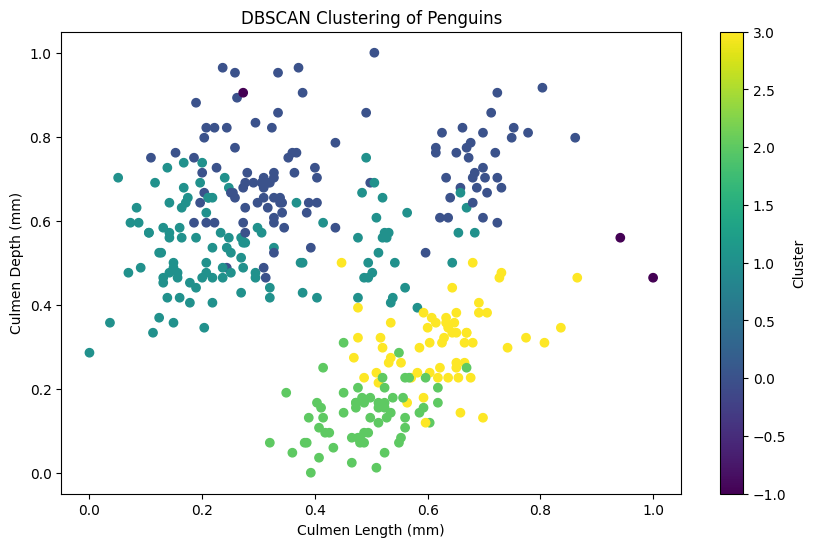

In [468]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Custom silhouette score function that returns a high negative value if there's only one cluster
def evaluate_silhouette(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1

# Load and preprocess the data
df = pd.read_csv('penguins.csv')
# One-hot encoding for 'sex' column
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.dropna(inplace=True)
df = df[(df.flipper_length_mm < 1000) & (df.flipper_length_mm > 0)]

# Rescale the data
scaler = MinMaxScaler()
df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# Define parameter grid
param_grid = {
    'eps': np.arange(0.1, 6.1, 0.1),
    'min_samples': range(2, 10)
}

# Perform manual grid search
best_score = -1
best_params = {'eps': None, 'min_samples': None}

X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_MALE']]

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        sil_score = evaluate_silhouette(X, eps, min_samples)
        print(f"Parameters: eps={eps}, min_samples={min_samples} - Silhouette Score: {sil_score:.4f}")
        if sil_score > best_score:
            print(f"New Best Silhouette Score: {sil_score:.4f}")
            best_score = sil_score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Fit DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels = dbscan.fit_predict(X)

# Add cluster labels to the dataframe
df['cluster'] = labels

# Plot the clusters using viridis colormap
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'], c=df['cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('DBSCAN Clustering of Penguins')
plt.show()


Parameters: n_components=2, covariance_type=full - Silhouette Score: 0.5607
New Best Silhouette Score: 0.5607
Parameters: n_components=2, covariance_type=tied - Silhouette Score: 0.5607
Parameters: n_components=2, covariance_type=diag - Silhouette Score: 0.5607
Parameters: n_components=2, covariance_type=spherical - Silhouette Score: 0.5607
Parameters: n_components=3, covariance_type=full - Silhouette Score: 0.5750
New Best Silhouette Score: 0.5750
Parameters: n_components=3, covariance_type=tied - Silhouette Score: 0.5750
Parameters: n_components=3, covariance_type=diag - Silhouette Score: 0.5615
Parameters: n_components=3, covariance_type=spherical - Silhouette Score: 0.5750
Parameters: n_components=4, covariance_type=full - Silhouette Score: 0.6174
New Best Silhouette Score: 0.6174
Parameters: n_components=4, covariance_type=tied - Silhouette Score: 0.6174
Parameters: n_components=4, covariance_type=diag - Silhouette Score: 0.6174
Parameters: n_components=4, covariance_type=spherica

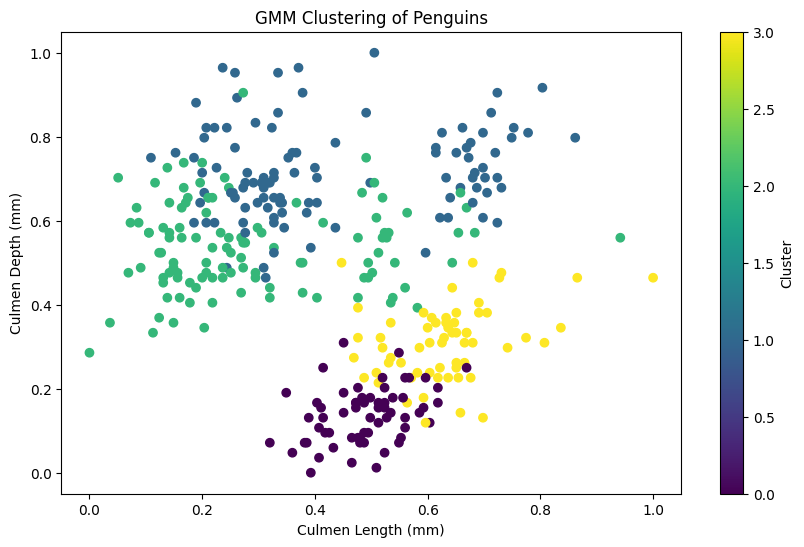

In [469]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Custom silhouette score function that returns a high negative value if there's only one cluster
def evaluate_silhouette(X, n_components, covariance_type):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    labels = gmm.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1

# Load and preprocess the data
df = pd.read_csv('penguins.csv')
# One-hot encoding for 'sex' column
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.dropna(inplace=True)
df = df[(df.flipper_length_mm < 1000) & (df.flipper_length_mm > 0)]

# Rescale the data
scaler = MinMaxScaler()
df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

# Define parameter grid
param_grid = {
    'n_components': range(2, 10),
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

# Perform manual grid search
best_score = -1
best_params = {'n_components': None, 'covariance_type': None}

X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_MALE']]

for n_components in param_grid['n_components']:
    for covariance_type in param_grid['covariance_type']:
        sil_score = evaluate_silhouette(X, n_components, covariance_type)
        print(f"Parameters: n_components={n_components}, covariance_type={covariance_type} - Silhouette Score: {sil_score:.4f}")
        if sil_score > best_score:
            print(f"New Best Silhouette Score: {sil_score:.4f}")
            best_score = sil_score
            best_params['n_components'] = n_components
            best_params['covariance_type'] = covariance_type

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Fit GMM with the best parameters
best_gmm = GaussianMixture(n_components=best_params['n_components'], covariance_type=best_params['covariance_type'])
labels = best_gmm.fit_predict(X)

# Add cluster labels to the dataframe
df['cluster'] = labels

# Plot the clusters using viridis colormap
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'], c=df['cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('GMM Clustering of Penguins')
plt.show()

